<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionalesI/blob/main/ProyectoML/Cerebro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sigm = lambda x: 1/(1+np.exp(-x))

In [3]:
x = np.linspace(-10,10,100)
y = sigm(x)

In [4]:
#plt.plot(x,y)

In [12]:
class Layer:

  def __init__(self,NC,NN, ActFunc, rate = 0.2):

    self.NC = NC
    self.NN = NN
    self.ActFunc = ActFunc
    self.rate = rate

    self.W = np.random.uniform(-10,10, size=(self.NC,self.NN))
    self.b = np.random.uniform(-10,10, size=(1,self.NN))

  def Activation(self,x):
    z = np.dot(x,self.W) + self.b
    return self.ActFunc(z)[0]

  def Mutate(self):
    self.W += np.random.normal(loc=0,scale=self.rate, size=(self.NC,self.NN))
    self.b += np.random.normal(loc=0,scale=self.rate, size=(1,self.NN))
    #self.W += np.random.uniform(-10,10, size=(self.NC,self.NN))
    #self.b += np.random.uniform(-10,10, size=(1,self.NN))

In [19]:
l0 = Layer(2,10,sigm)
l1  =Layer(10,4,sigm)
l2 = Layer(4,1,sigm)

In [20]:
Brain = [l0,l1,l2]

In [23]:
def BrainActivation(Brain,x):

  for i in range(len(Brain)):
    if i == 0:
      output = Brain[i].Activation(x)
    else:
      output = Brain[i].Activation(output)

  return output

In [24]:
BrainActivation(Brain,np.array([1,1]))

array([0.00018711])

In [26]:
x = np.linspace(-1,1,50)
y = np.linspace(-1,1,50)
X,Y = np.meshgrid(x,y)
N = np.zeros_like(X)
N1 = np.zeros_like(X)

for i in range(50):
  for j in range(50):
    N[i,j]  = BrainActivation(Brain,np.array([x[i],y[j]]))[0]
    N1[i,j] = BrainActivation(Brain,np.array([x[i],y[j]]))[0]

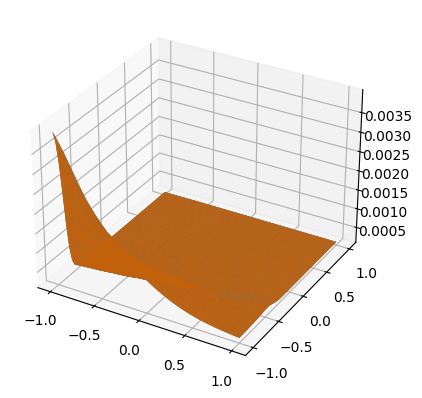

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,N)
ax.plot_surface(X,Y,N1)